In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles, make_swiss_roll
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram

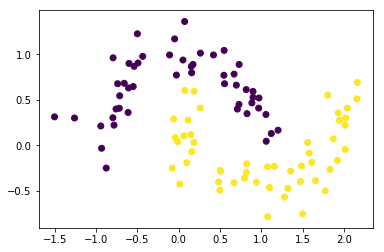

In [15]:
attributes, clusters = make_moons(noise=0.15)
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

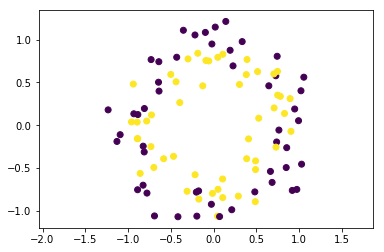

In [19]:
attributes, clusters = make_circles(noise=0.15)
plt.axes().set_aspect("equal", "datalim")
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

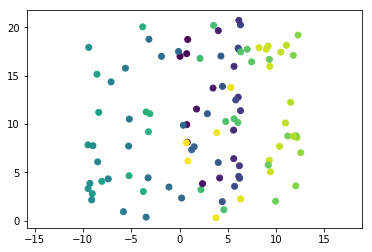

In [22]:
attributes, clusters = make_swiss_roll()
plt.axes().set_aspect("equal", "datalim")
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

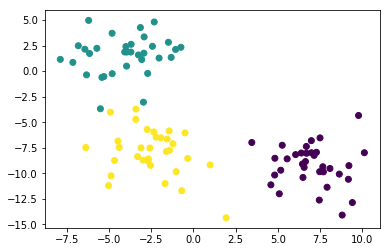

In [29]:
attributes, clusters = make_blobs(centers=3, cluster_std=2)
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

In [34]:
k_means = KMeans(3, init="random")
predicted = k_means.fit_predict(attributes)
predicted

array([0, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0,
       0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 2, 2], dtype=int32)

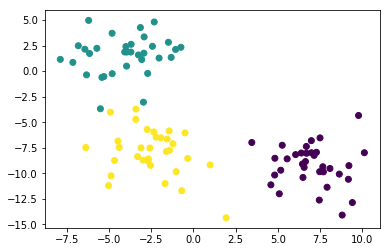

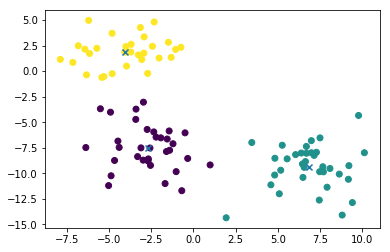

In [42]:
plt.scatter(attributes[:, 0], attributes[:, 1], c = clusters)
plt.show()
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.show()

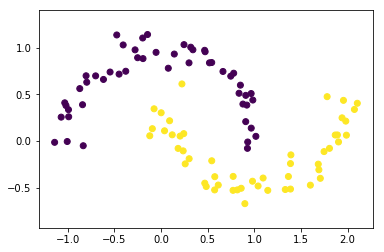

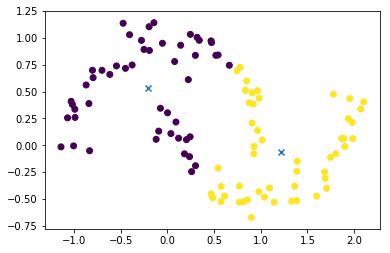

In [46]:
attributes, clusters = make_moons(noise=0.10)
plt.axes().set_aspect("equal", "datalim")
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

k_means = KMeans(2, init="random")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.show()

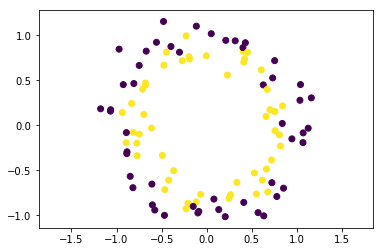

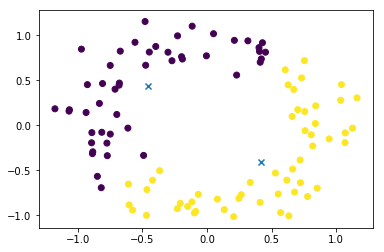

In [50]:
attributes, clusters = make_circles(noise=0.10)
plt.axes().set_aspect("equal", "datalim")
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

k_means = KMeans(2, init="random")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.show()

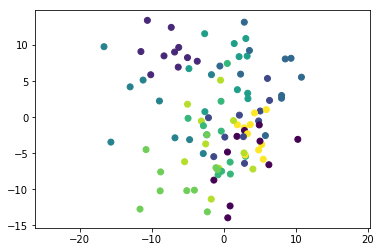

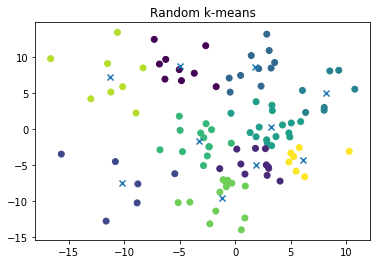

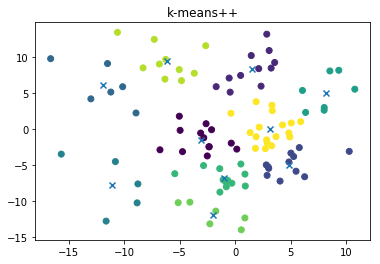

In [60]:
centers = 10

attributes, clusters = make_blobs(centers= centers, cluster_std=3.5)
plt.axes().set_aspect("equal", "datalim")
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()

k_means = KMeans(centers, init="random")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.title("Random k-means")
plt.show()

k_means = KMeans(centers, init="k-means++")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.title("k-means++")
plt.show()

In [61]:
###

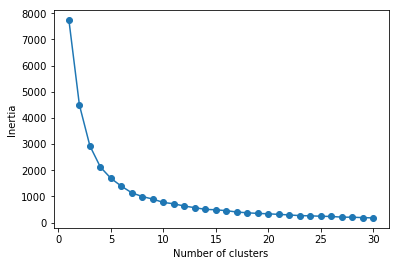

In [65]:
inertias = []
for i in range(1, 31):
    km = KMeans(n_clusters = i)
    km.fit(attributes)
    inertias.append(km.inertia_)
plt.plot(range(1,31), inertias, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

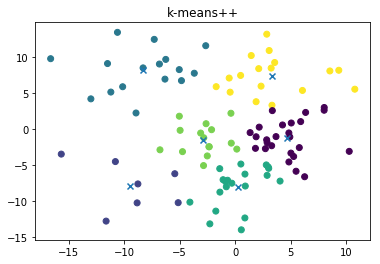

In [66]:
k_means = KMeans(6, init="k-means++")
predicted = k_means.fit_predict(attributes)
plt.scatter(attributes[:, 0], attributes[:, 1], c = predicted)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker="x")
plt.title("k-means++")
plt.show()

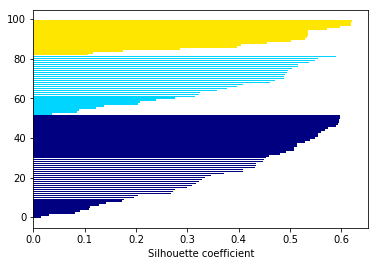

In [74]:
import matplotlib.cm
km = KMeans(3) # Also, 2 and 4
predicted = km.fit_predict(attributes)
silhouette_vals = silhouette_samples(attributes, predicted)
y_min, y_max = 0, 0
y_ticks = []
cluster_labels = np.unique(predicted)
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[predicted == c]
    c_silhouette_vals.sort()
    y_max += len(c_silhouette_vals)
    color = matplotlib.cm.jet(i / cluster_labels.shape[0])
    plt.barh(range(y_min, y_max), c_silhouette_vals, color = color)
    y_min += len(c_silhouette_vals)
plt.xlabel("Silhouette coefficient")

In [79]:
###

In [81]:
aggl = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
aggl_predicred = aggl.fit_predict(attributes)
aggl_predicred

array([0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 0])

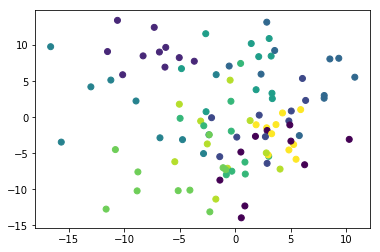

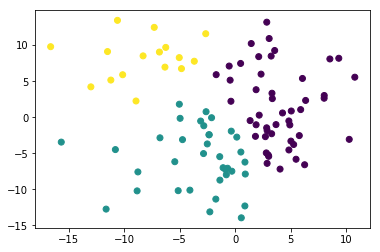

In [82]:
plt.scatter(attributes[:, 0], attributes[:, 1], c=clusters)
plt.show()
plt.scatter(attributes[:, 0], attributes[:, 1], c=aggl_predicred)
plt.show()

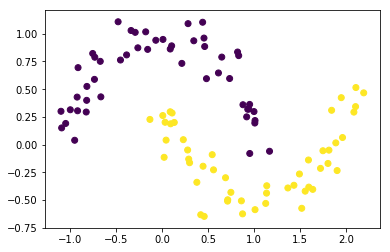

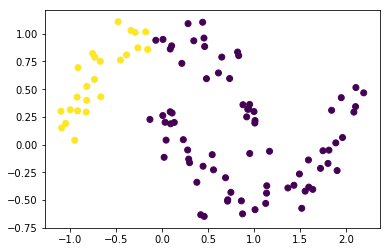

In [86]:
attributes_moons, clusters_moons = make_moons(noise=0.10)
aggl_moons = AgglomerativeClustering(2, linkage="ward")
pred_moons = aggl_moons.fit_predict(attributes_moons)
plt.scatter(attributes_moons[:, 0], attributes_moons[:, 1], c=clusters_moons)
plt.show()
plt.scatter(attributes_moons[:, 0], attributes_moons[:, 1], c=pred_moons)
plt.show()

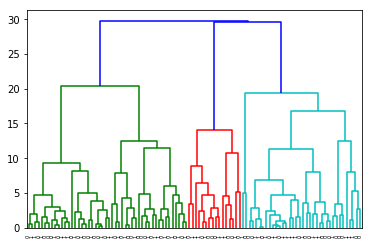

In [89]:
row_clusters = linkage(attributes, method = "complete", metric = "euclidean")
row_dendr = dendrogram(row_clusters, labels = clusters_moons)

In [91]:
db = DBSCAN(eps = 0.2, min_samples = 5, metric = "euclidean")